# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

Максимальный балл за задание - 10.

## Часть 1. Обучение моделей классификации (5 баллов).

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

**A. (1 балл)** Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

**B. (1 балл)** Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

**C. (1 балл)** Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

**D. (1 балл)** Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

**E. (1 балл)** Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC?
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [4]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [6]:
# Preprocessing
replacement_dict = {'Yes':1, 'No':0}
df = df.replace({'International plan':replacement_dict,
                 'Voice mail plan':replacement_dict})
df = df.drop(columns = ['State'])
df['Churn'] = df['Churn'].astype(int)
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
X = df.drop(columns = ['Churn']) 
y = df['Churn']

In [8]:
y.unique()

array([0, 1])

In [9]:
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [10]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)


In [11]:
scaller = StandardScaler()
X_train_scaled = scaller.fit_transform(X_train)
X_test_scaled = scaller.transform(X_test)

### Logistic Regression

In [12]:
parameters = {'C': np.arange(0.1,0.5,0.05),
              'penalty' : ['l2', None]}
model = LogisticRegression()
lr_1 = GridSearchCV(model, parameters).fit(X_train_scaled, y_train)
lr_1.best_params_

{'C': 0.20000000000000004, 'penalty': 'l2'}

In [13]:
y_pred = lr_1.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precission:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.848
Recall: 0.15172413793103448
Precission: 0.43137254901960786
F1: 0.22448979591836735


**Вывод**
Видим, что Recall очень низкий, а значит, мы предсказываем верно отток, только в 4% из всех отточных, и тк эккураси очень высок - наша модель переобучилась, и чаще предсказывает, что клиент не собирается уходить
<br> Поэтому добавим балансировку классов

In [14]:
parameters = {'C': np.arange(0.1,0.5,0.05),
              'penalty' : ['l2'],
              'class_weight' : ['balanced']}
model = LogisticRegression()
lr_2 = GridSearchCV(model, parameters).fit(X_train_scaled, y_train)
lr_2.best_params_

{'C': 0.15000000000000002, 'class_weight': 'balanced', 'penalty': 'l2'}

In [15]:
y_pred = lr_2.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precission:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('ROC_AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.751
Recall: 0.7034482758620689
Precission: 0.33116883116883117
F1: 0.4503311258278146
ROC_AUC: 0.7312563016737246


**Вывод**
Тк реколл существенно вырос, наша модель стала гораздо лучше улавливать отточных клиентов. Модель менее предвзята (мы уменьшили переобученность)

### SVM (Support Vectors)

In [16]:
parameters = {'C': np.arange(0.1,1.1,0.1), 'kernel' : ['linear']}
model = SVC()
svm = GridSearchCV(model, parameters).fit(X_train_scaled, y_train)
svm.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [17]:
y_pred = svm.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precission:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('ROC_AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.855
Recall: 0.0
Precission: 0.0
F1: 0.0
ROC_AUC: 0.5


**Вывод** видим очень сильное переобучение, всегда предсказывается 0 (не отток)

In [18]:
parameters = {'C': np.arange(0.1,1.1,0.1), 'class_weight':['balanced'], 'kernel' : ['linear']}
model = SVC()
svm = GridSearchCV(model, parameters).fit(X_train_scaled, y_train)
svm.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}

In [19]:
y_pred = svm.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precission:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('ROC_AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.744
Recall: 0.6896551724137931
Precission: 0.3215434083601286
F1: 0.43859649122807026
ROC_AUC: 0.7214357733413995


### PolynomialFeatures

In [20]:
from sklearn.preprocessing import PolynomialFeatures


pf = PolynomialFeatures()
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

scaller = StandardScaler()
X_train_pf_scaled = scaller.fit_transform(X_train_pf)
X_test_pf_scaled = scaller.transform(X_test_pf)

In [21]:
parameters = {'C': np.arange(0.1,0.5,0.05),
              'penalty' : ['l2'],
              'class_weight' : ['balanced']}
model = LogisticRegression()
lr_3 = GridSearchCV(model, parameters).fit(X_train_pf_scaled, y_train)

y_pred = lr_3.predict(X_test_pf_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precission:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('ROC_AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.846
Recall: 0.7448275862068966
Precission: 0.48
F1: 0.5837837837837837
ROC_AUC: 0.8039927404718694


In [22]:
parameters = {'C': np.arange(0.1,1.1,0.1), 'class_weight':['balanced'], 'kernel' : ['linear']}
model = SVC()
svm_3 = GridSearchCV(model, parameters).fit(X_train_pf_scaled, y_train)
svm_3.best_params_

y_pred = svm_3.predict(X_test_pf_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precission:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('ROC_AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.848
Recall: 0.7448275862068966
Precission: 0.484304932735426
F1: 0.5869565217391305
ROC_AUC: 0.8051623311151442


**Вывод** качество у обоих моделей существенно уличшилось, метрики SVM и LR при использовании полиномиальных признаков почти сравнялись

### Correlation Matrix

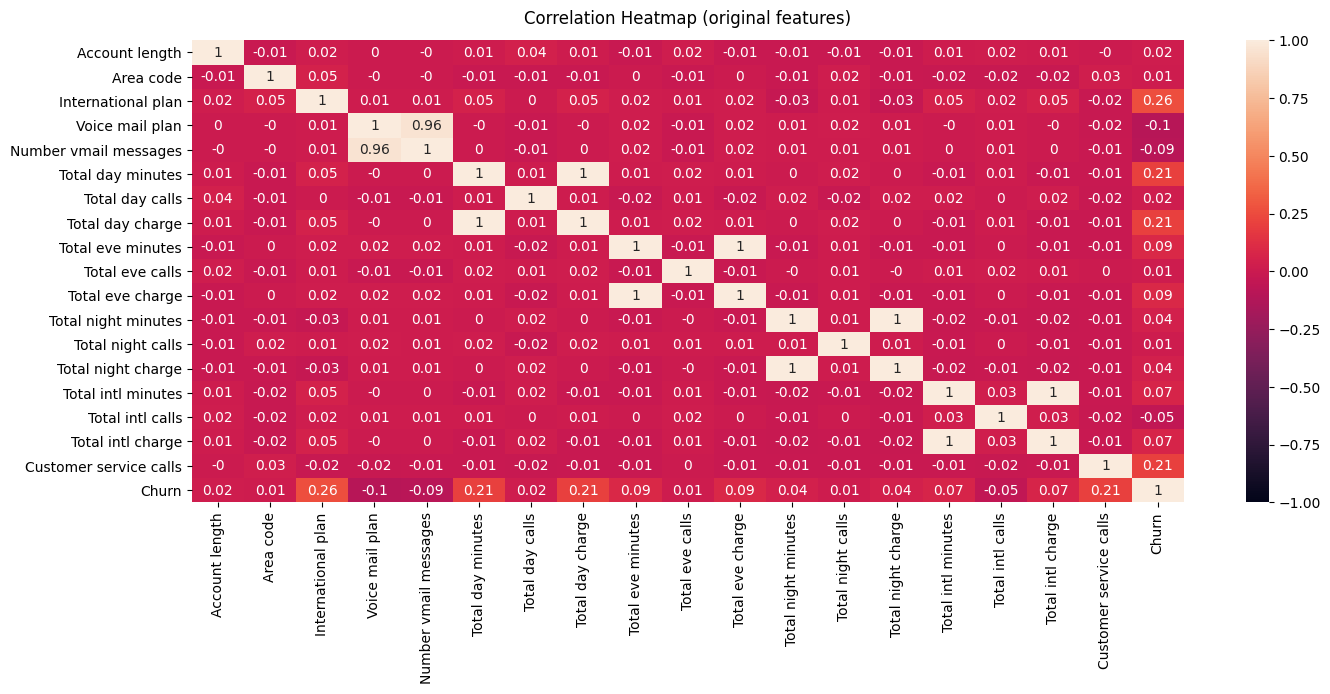

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method='pearson').round(2), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap (original features)', fontdict={'fontsize':12}, pad=12);

**Вывод** да, есть признаки, которые почти не коррелируют с таргетом, а также есть признаки с очень высокой корреляцией между друг другом

In [24]:
# Strongest Correlations (polynomial features)

pf = PolynomialFeatures(2)
X_pf = pf.fit_transform(X)
columns_names = ['ONE'] + list(X.columns) + ['PF' + str(i-X.shape[1]) for i in range(X.shape[1], X_pf.shape[1]-1)]
frame = pd.DataFrame(X_pf, columns = columns_names)
frame['Churn'] = y

pairs = []
columns = list(frame.columns)
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        correlation = frame[columns[i]].corr(frame[columns[j]])
        if abs(correlation) > 0.85:
            pair = (columns[i], columns[j], correlation)
            pairs.append(pair)
            
most_correlated = pd.DataFrame(pairs, columns = ['f1', 'f2', 'corr'])
most_correlated.sort_values(by = ['corr'])

,f1,f2,corr
714,PF92,PF142,0.851251
712,PF92,PF125,0.851252
737,PF115,PF142,0.851254
735,PF115,PF125,0.851255
762,PF125,PF170,0.851370
...,...,...,...
634,PF67,PF69,1.000000
342,PF38,PF40,1.000000
8,International plan,PF35,1.000000
26,Voice mail plan,PF51,1.000000


In [25]:
# Уберем колонки с высокой корреляцией
columns_to_drop = most_correlated['f2'].unique()
frame = frame.drop(columns = columns_to_drop)
print(frame.shape)

(3333, 47)


In [26]:
# Weakest correlations with target (Churn)
pairs = []
columns = list(frame.columns)
for i in range(len(columns)):
    if columns[i] != 'Churn':
        correlation = frame[columns[i]].corr(frame['Churn'])
        if abs(correlation) < 0.1:
            pair = (columns[i], 'Churn', correlation)
            pairs.append(pair)
            
least_correlated = pd.DataFrame(pairs, columns = ['f1', 'Churn', 'corr'])
least_correlated.sort_values(by = ['corr'])


,f1,Churn,corr
13,PF63,Churn,-0.081672
8,Total intl calls,Churn,-0.052844
12,PF15,Churn,-0.033015
14,PF65,Churn,0.002846
6,Total night calls,Churn,0.006141
1,Area code,Churn,0.006174
4,Total eve calls,Churn,0.009233
25,PF129,Churn,0.010924
0,Account length,Churn,0.016541
19,PF99,Churn,0.017085


In [27]:
# Уберем колонки с околонулевой корреляцией с таргетом
columns_to_drop = least_correlated['f1'].unique()
frame = frame.drop(columns = columns_to_drop)
print(frame.shape)

(3333, 17)


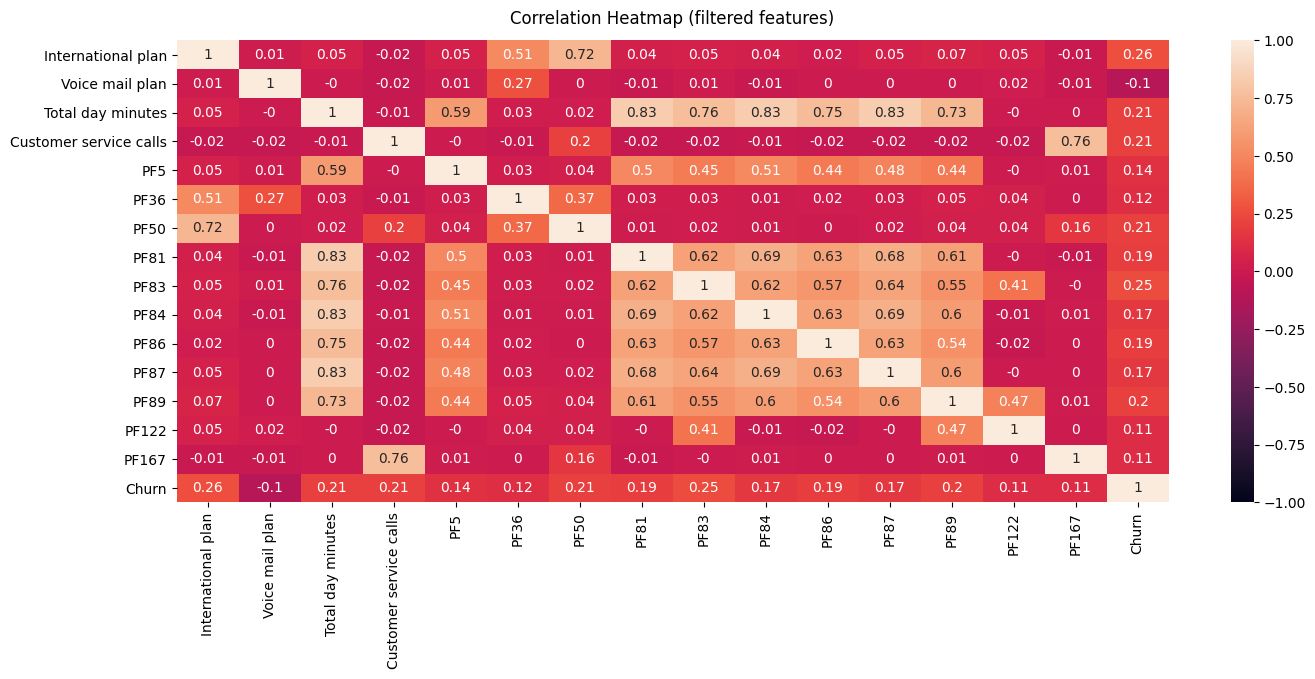

In [28]:
plt.figure(figsize=(16, 6))
frame = frame.drop(columns = ['ONE'])
heatmap = sns.heatmap(frame.corr(method='pearson').round(2), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap (filtered features)', fontdict={'fontsize':12}, pad=12);

### Протестируем модели на новом наборе фичей

In [29]:
X = frame.drop(columns = ['Churn']) 
y = frame['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

scaller = StandardScaler()
X_train_scaled = scaller.fit_transform(X_train)
X_test_scaled = scaller.transform(X_test)

#### LR

In [30]:
parameters = {'C': np.arange(0.1,0.5,0.05),
              'penalty' : ['l2'],
              'class_weight' : ['balanced']}
model = LogisticRegression()
lr_4 = GridSearchCV(model, parameters).fit(X_train_scaled, y_train)

y_pred = lr_4.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precission:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('ROC_AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.752
Recall: 0.7034482758620689
Precission: 0.3322475570032573
F1: 0.4513274336283185
ROC_AUC: 0.7318410969953622


In [31]:
parameters = {'C': np.arange(0.1,1.1,0.1), 'class_weight':['balanced'], 'kernel' : ['linear']}
model = SVC()
svm_4 = GridSearchCV(model, parameters).fit(X_train_scaled, y_train)
svm_4.best_params_

y_pred = svm_4.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precission:', precision_score(y_test, y_pred)) 
print('F1:', f1_score(y_test, y_pred))
print('ROC_AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.762
Recall: 0.7379310344827587
Precission: 0.3485342019543974
F1: 0.4734513274336283
ROC_AUC: 0.7520064529138939


**Вывод** удаление характеристик с высокойй корреляцие между собой и низкой с целевой переменно не принесло улучшений. Результат стал даже хуже, но несущественно
a) Наилучший результат У SVM при использовании полиномиальных признков: accuracy - 0.848, recall - 0.744, precision - 0.484, F1 - 0.58, Roc_auc - 0.8. Без использования полиномиальных признаков качество лучше у логитической регрессии при добавлении балансировки классов: accuracy - 0.751, recall - 0.7, precision - 0.33, f1 - 0.45, Roc_AUC - 0.73 b) Удалили характеристики с высокой корреляцией между собой и низкой с целевой переменной c) переобучение и недообучение отстуствует, несмотря на то, что после удаления переменных качество модели упало

## Часть 2. Оценка качества моделей классификации (5 баллов).

**Задание 0. (0.25 балла)** Закончите определения, начинающиеся так:

    * accuracy - это доля правильных ответов...
    
    * точность (precision) - это доля правильных ответов...
    
    * полнота (recall) - это доля правильных ответов...
    
    * TPR - это доля правильных ответов...
    
    
Продолжите определения прямо в этой ячейке.

_______________________________________________________________________________________________

В этой части вы будете работать с данными в задаче скоринга. За работу с этими данными можно получить **5 баллов.**

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные).
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [96]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [97]:
df.shape

(689, 21)

**Задание 1. (0.25 балла)** Проверьте target на сбалансированность по классам, сделайте вывод.

In [98]:
df['target'].value_counts(normalize=True) 
# классы относительно сбалансированны (класс 0 втречается на 10% чаще)


0    0.554427
1    0.445573
Name: target, dtype: float64

**Задание 2. (0.25 балла)** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [99]:
for i in [1,2,3]:
    print(f'Accuracy алгоритма #{i}:', np.round(accuracy_score(df['target'], df[f'pred{i}_classes']), 3))

Accuracy алгоритма #1: 0.662
Accuracy алгоритма #2: 0.672
Accuracy алгоритма #3: 0.64


**Задание 3. (0.25 балла)** Теперь вычислите точность и полноту каждого из алгоритмов.

In [100]:
for i in [1,2,3]:
    print(f'Precision алгоритма #{i}:', np.round(precision_score(df['target'], df[f'pred{i}_classes']), 3))

Precision алгоритма #1: 0.691
Precision алгоритма #2: 0.61
Precision алгоритма #3: 0.69


In [101]:
for i in [1,2,3]:
    print(f'Recall алгоритма #{i}:', np.round(recall_score(df['target'], df[f'pred{i}_classes']), 3))

Recall алгоритма #1: 0.436
Recall алгоритма #2: 0.73
Recall алгоритма #3: 0.349


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4. (0.5 балла)** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

,1,0
1,134,60
0,173,322


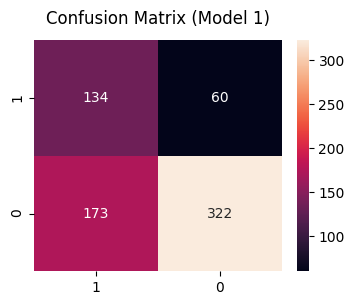

In [102]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, title):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    col1 = [tp, fp]
    col2 = [fn, tn]
    cm = pd.DataFrame([[tp, fp], [fn, tn]], index = ['1', '0'], columns = ['1', '0'])
    plt.figure(figsize = (4,3))
    heatmap = sns.heatmap(cm[['1', '0']], annot=True, fmt='.3g')
    heatmap.set_title(title, fontdict={'fontsize':12}, pad=12);
    return cm
cm_model1 = plot_confusion_matrix(df['target'], df[f'pred1_classes'], title='Confusion Matrix (Model 1)')
display(cm_model1[['1', '0']])

,1,0
1,224,143
0,83,239


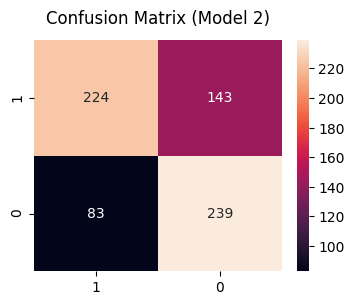

In [103]:
cm_model2 = plot_confusion_matrix(df['target'], df[f'pred2_classes'], title='Confusion Matrix (Model 2)')
display(cm_model2[['1', '0']])

,1,0
1,107,48
0,200,334


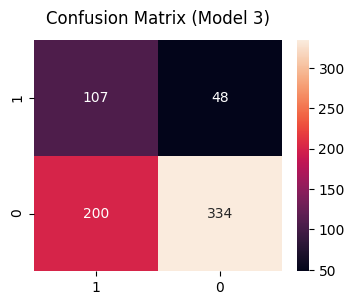

In [104]:
cm_model3 = plot_confusion_matrix(df['target'], df[f'pred3_classes'], title='Confusion Matrix (Model 3)')
display(cm_model3[['1', '0']])

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5. (0.5 балла)** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [105]:
# Model 1
pairs = []
for i in np.arange(0.1, 1, 0.1):
    f1 = df[['target', 'pred1_probs']]
    f1['pred'] = f1['pred1_probs'].apply(lambda x: 1 if x>i else 0)
    tn, fp, fn, tp = confusion_matrix(f1['target'], f1['pred']).ravel()
    acc = accuracy_score(f1['target'], f1['pred'])
    pairs.append((i, acc, fn))

metrics = pd.DataFrame(pairs, columns = ['threshold', 'Accuracy', 'FN_rate'])
metrics = metrics[(metrics['Accuracy'] >= .65)]
metrics = metrics[(metrics['FN_rate'] == metrics['FN_rate'].min())]
metrics

,threshold,Accuracy,FN_rate
3,0.4,0.667634,105


In [106]:
# Model 2
pairs = []
for i in np.arange(0.1, 1, 0.1):
    f2 = df[['target', 'pred2_probs']]
    f2['pred'] = f2['pred2_probs'].apply(lambda x: 1 if x>i else 0)
    tn, fp, fn, tp = confusion_matrix(f2['target'], f2['pred']).ravel()
    acc = accuracy_score(f2['target'], f2['pred'])
    pairs.append((i, acc, fn))

metrics = pd.DataFrame(pairs, columns = ['threshold', 'Accuracy', 'FN_rate'])
metrics = metrics[(metrics['Accuracy'] >= .65)]
metrics = metrics[(metrics['FN_rate'] == metrics['FN_rate'].min())]
metrics

,threshold,Accuracy,FN_rate
2,0.3,0.674891,50


In [107]:
# Model 3
pairs = []
for i in np.arange(0.1, 1, 0.01):
    f3 = df[['target', 'pred3_probs']]
    f3['pred'] = f3['pred3_probs'].apply(lambda x: 1 if x>i else 0)
    tn, fp, fn, tp = confusion_matrix(f3['target'], f3['pred']).ravel()
    acc = accuracy_score(f3['target'], f3['pred'])
    pairs.append((i, acc, fn))

metrics = pd.DataFrame(pairs, columns = ['threshold', 'Accuracy', 'FN_rate'])
metrics = metrics[(metrics['Accuracy'] >= .62)]
metrics = metrics[(metrics['FN_rate'] == metrics['FN_rate'].min())]
metrics

,threshold,Accuracy,FN_rate
10,0.2,0.622642,90


**Задание 6. (0.5 балла)** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

,1,0
1,202,124
0,105,258


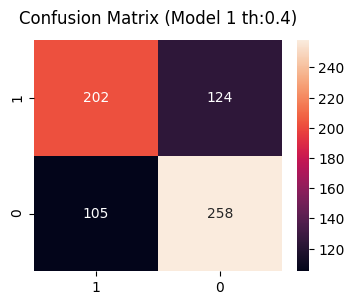

In [44]:
f1['pred'] = f1['pred1_probs'].apply(lambda x: 1 if x>0.4 else 0)
cm_model1 = plot_confusion_matrix(f1['target'], f1['pred'], title='Confusion Matrix (Model 1 th:0.4)')
display(cm_model1[['1', '0']])

,1,0
1,257,174
0,50,208


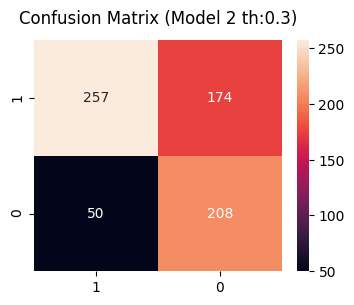

In [45]:
f2['pred'] = f2['pred2_probs'].apply(lambda x: 1 if x>0.3 else 0)
cm_model2 = plot_confusion_matrix(f2['target'], f2['pred'], title='Confusion Matrix (Model 2 th:0.3)')
display(cm_model2[['1', '0']])

,1,0
1,217,170
0,90,212


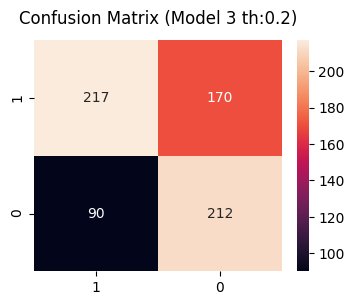

In [46]:
f3['pred'] = f3['pred3_probs'].apply(lambda x: 1 if x>0.2 else 0)
cm_model3 = plot_confusion_matrix(f3['target'], f3['pred'], title='Confusion Matrix (Model 3 th:0.2)')
display(cm_model3[['1', '0']])

**Вывод** лучше всех справилась модель 2 с трешхолдом 0.3

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги).
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7. (0.5 балла)** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

In [53]:
# Model 1
pairs = []
for i in np.arange(0.1, 1, 0.1):
    f1 = df[['target', 'pred1_probs']]
    f1['pred'] = f1['pred1_probs'].apply(lambda x: 1 if x>i else 0)
    tn, fp, fn, tp = confusion_matrix(f1['target'], f1['pred']).ravel()
    acc = accuracy_score(f1['target'], f1['pred'])
    pairs.append((i, acc, fp))

metrics = pd.DataFrame(pairs, columns = ['threshold', 'Accuracy', 'FP_rate'])
metrics = metrics[(metrics['Accuracy'] >= .65)]
metrics = metrics[(metrics['FP_rate'] == metrics['FP_rate'].min())]
metrics

,threshold,Accuracy,FP_rate
4,0.5,0.661829,60


In [54]:
# Model 2
pairs = []
for i in np.arange(0.1, 1, 0.1):
    f2 = df[['target', 'pred2_probs']]
    f2['pred'] = f2['pred2_probs'].apply(lambda x: 1 if x>i else 0)
    tn, fp, fn, tp = confusion_matrix(f2['target'], f2['pred']).ravel()
    acc = accuracy_score(f2['target'], f2['pred'])
    pairs.append((i, acc, fp))

metrics = pd.DataFrame(pairs, columns = ['threshold', 'Accuracy', 'FP_rate'])
metrics = metrics[(metrics['Accuracy'] >= .65)]
metrics = metrics[(metrics['FP_rate'] == metrics['FP_rate'].min())]
metrics

,threshold,Accuracy,FP_rate
6,0.7,0.656023,21


In [57]:
# Model 3
pairs = []
for i in np.arange(0.1, 1, 0.05):
    f3 = df[['target', 'pred3_probs']]
    f3['pred'] = f3['pred3_probs'].apply(lambda x: 1 if x>i else 0)
    tn, fp, fn, tp = confusion_matrix(f3['target'], f3['pred']).ravel()
    acc = accuracy_score(f3['target'], f3['pred'])
    pairs.append((i, acc, fp))

metrics = pd.DataFrame(pairs, columns = ['threshold', 'Accuracy', 'FP_rate'])
metrics = metrics[(metrics['Accuracy'] >= .62)]
metrics = metrics[(metrics['FP_rate'] == metrics['FP_rate'].min())]
metrics

,threshold,Accuracy,FP_rate
13,0.75,0.624093,28


**Задание 8. (0.5 балла)** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

,1,0
1,134,60
0,173,322


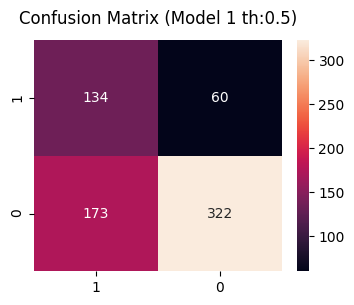

In [58]:
f1['pred'] = f1['pred1_probs'].apply(lambda x: 1 if x>0.5 else 0)
cm_model1 = plot_confusion_matrix(f1['target'], f1['pred'], title='Confusion Matrix (Model 1 th:0.5)')
display(cm_model1[['1', '0']])

,1,0
1,91,21
0,216,361


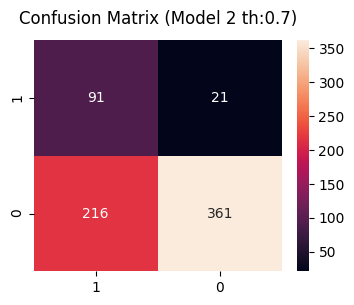

In [59]:
f2['pred'] = f2['pred2_probs'].apply(lambda x: 1 if x>0.7 else 0)
cm_model2 = plot_confusion_matrix(f2['target'], f2['pred'], title='Confusion Matrix (Model 2 th:0.7)')
display(cm_model2[['1', '0']])

,1,0
1,76,28
0,231,354


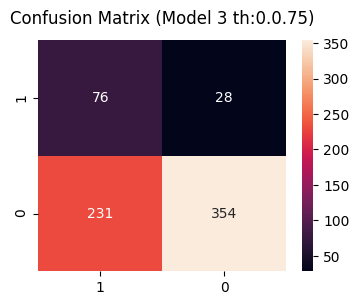

In [60]:
f3['pred'] = f3['pred3_probs'].apply(lambda x: 1 if x>0.75 else 0)
cm_model3 = plot_confusion_matrix(f3['target'], f3['pred'], title='Confusion Matrix (Model 3 th:0.0.75)')
display(cm_model3[['1', '0']])

**Вывод** лучше всех справилась модель 2 с трешхолдом 0.7

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9. (0.5 балла)** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [66]:
# Model 1
pairs = []
for i in np.arange(0.1, 1, 0.1):
    f1 = df[['target', 'pred1_probs']]
    f1['pred'] = f1['pred1_probs'].apply(lambda x: 1 if x>i else 0)
    score = f1_score(f1['target'], f1['pred'])
    pairs.append((i, score))

metrics = pd.DataFrame(pairs, columns = ['threshold', 'F1-Score'])
metrics = metrics[(metrics['F1-Score'] == metrics['F1-Score'].max())]
metrics

,threshold,F1-Score
2,0.3,0.652778


,1,0
1,282,275
0,25,107


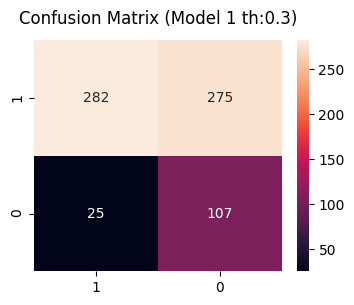

In [67]:
f1['pred'] = f1['pred1_probs'].apply(lambda x: 1 if x>0.3 else 0)
cm_model1 = plot_confusion_matrix(f1['target'], f1['pred'], title='Confusion Matrix (Model 1 th:0.3)')
display(cm_model1[['1', '0']])

In [63]:
# Model 2
pairs = []
for i in np.arange(0.1, 1, 0.1):
    f2 = df[['target', 'pred2_probs']]
    f2['pred'] = f2['pred2_probs'].apply(lambda x: 1 if x>i else 0)
    score = f1_score(f2['target'], f2['pred'])
    pairs.append((i, score))

metrics = pd.DataFrame(pairs, columns = ['threshold', 'F1-Score'])
metrics = metrics[(metrics['F1-Score'] == metrics['F1-Score'].max())]
metrics

,threshold,F1-Score
2,0.3,0.696477


,1,0
1,257,174
0,50,208


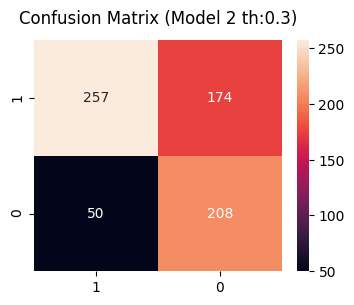

In [69]:
f2['pred'] = f2['pred2_probs'].apply(lambda x: 1 if x>0.3 else 0)
cm_model2 = plot_confusion_matrix(f2['target'], f2['pred'], title='Confusion Matrix (Model 2 th:0.3)')
display(cm_model2[['1', '0']])

In [64]:
# Model 3
pairs = []
for i in np.arange(0.1, 1, 0.05):
    f3 = df[['target', 'pred3_probs']]
    f3['pred'] = f3['pred3_probs'].apply(lambda x: 1 if x>i else 0)
    score = f1_score(f3['target'], f3['pred'])
    pairs.append((i, score))

metrics = pd.DataFrame(pairs, columns = ['threshold', 'F1-Score'])
metrics = metrics[(metrics['F1-Score'] == metrics['F1-Score'].max())]
metrics

,threshold,F1-Score
1,0.15,0.644342


,1,0
1,279,280
0,28,102


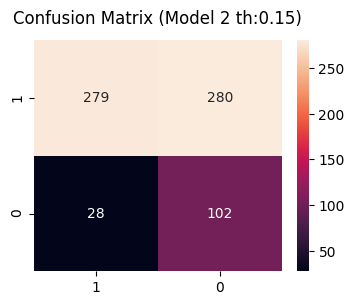

In [70]:
f3['pred'] = f3['pred3_probs'].apply(lambda x: 1 if x>0.15 else 0)
cm_model3 = plot_confusion_matrix(f3['target'], f3['pred'], title='Confusion Matrix (Model 2 th:0.15)')
display(cm_model3[['1', '0']])

**Вывод** лучше всех справилась модель 2 с трешхолдом 0.3

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [65]:
from sklearn.metrics import classification_report

print(classification_report(df['target'], df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10. (0.5 балла)** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [72]:
X = df.drop(columns = ['target','pred1_probs',
                       'pred1_classes', 'pred2_probs',
                       'pred2_classes', 'pred3_probs',
                       'pred3_classes'])

y = df[['target']]
scaller = StandardScaler()
X_scaled = scaller.fit_transform(X)

In [73]:
parameters = {'C': np.arange(0.1,0.5,0.05),
              'penalty' : ['l2'],
              'class_weight' : ['balanced', None]}
model = LogisticRegression()
lr = GridSearchCV(model, parameters).fit(X_scaled, y)
lr.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [74]:
y_pred = lr.predict(X_scaled)
print('Accuracy:', accuracy_score(y, y_pred))
print('Recall:', recall_score(y, y_pred))
print('Precission:', precision_score(y, y_pred))
print('F1:', f1_score(y, y_pred))
print('ROC_AUC:', roc_auc_score(y, y_pred))

Accuracy: 0.8737300435413643
Recall: 0.9120521172638436
Precission: 0.8235294117647058
F1: 0.865533230293663
ROC_AUC: 0.8774920272183091


**Задание 11. (0.5 балла)** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность
    б) полноту
    в) f1-score.
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [87]:
probs = pd.DataFrame(lr.predict_proba(X_scaled), columns = ['prob', '1-prob'])
probs = probs[['prob']]
rows = []
for i in np.arange(0.1, 1, 0.05):
    probs['pred'] = probs['prob'].apply(lambda x: 1 if i>x else 0)
    acc = accuracy_score(y, probs['pred'])
    tn, fp, fn, tp = confusion_matrix(y, probs['pred']).ravel()
    recall = recall_score(y, probs['pred'])
    f_score = f1_score(y, probs['pred'])
    rows.append((i, acc, fn, recall, f_score))
    
metrics = pd.DataFrame(rows, columns = ['Threshold', 'Accuracy', 'FN_rate', 'Recall', 'F1-Score'])
metrics

,Threshold,Accuracy,FN_rate,Recall,F1-Score
0,0.10,0.744557,172,0.439739,0.605381
1,0.15,0.796807,132,0.570033,0.714286
2,0.20,0.828737,105,0.657980,0.773946
3,0.25,0.853411,84,0.726384,0.815356
4,0.30,0.863570,68,0.778502,0.835664
5,0.35,0.870827,56,0.817590,0.849408
6,0.40,0.875181,46,0.850163,0.858553
7,0.45,0.878084,33,0.892508,0.867089
8,0.50,0.873730,27,0.912052,0.865533
9,0.55,0.870827,25,0.918567,0.863706


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


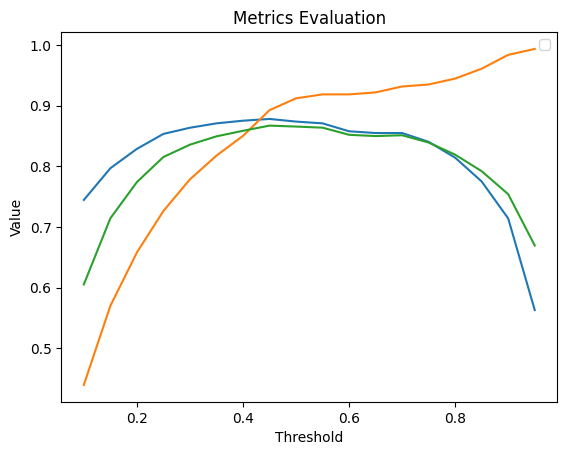

In [95]:
sns.lineplot(x='Threshold', y='Accuracy', data=metrics)
sns.lineplot(x='Threshold', y='Recall', data=metrics)
sns.lineplot(x='Threshold', y='F1-Score', data=metrics).set(title='Metrics Evaluation', xlabel='Threshold', ylabel='Value')


In [88]:
# a)
metrics[metrics['Accuracy'] == metrics['Accuracy'].max()]

,Threshold,Accuracy,FN_rate,Recall,F1-Score
7,0.45,0.878084,33,0.892508,0.867089


In [89]:
# b)
metrics[metrics['FN_rate'] == metrics['FN_rate'].min()]

,Threshold,Accuracy,FN_rate,Recall,F1-Score
17,0.95,0.563135,2,0.993485,0.669594


In [90]:
# c)
metrics[metrics['F1-Score'] == metrics['F1-Score'].max()]

,Threshold,Accuracy,FN_rate,Recall,F1-Score
7,0.45,0.878084,33,0.892508,0.867089


**Вывод** лучшая модель - Логистическая регрессия, с трешхолдом 0.45.<br> Да, модель сильно лучше, достаточно посмотреть на метрики